In [1]:
import scanpy as sc

In [2]:
import pandas as pd

In [3]:
import numpy as np

In [6]:
from tqdm import tqdm
# use a progress bar 

In [7]:
sample_folders = ["RB01_rep1", "RB01_rep2", "RB02_rep1", "RB02_rep2", "RB03_rep1", "RB03_rep2", "RB04", "RB05", "RB06", "RB07",]
# Create an empty list first
adata_list = []

In [8]:
# use a for-loop to read in all the files
for sample in tqdm(sample_folders): 
    pathname = "D:/Research raw data/"+sample
    print("Reading files at:" + pathname)
    adata=sc.read_10x_mtx("D:/Research raw data/"+sample)
    patient_id = sample[:4] # extract the patient info
    sample_id = sample # extract the sample info
    # we add the patient and sample information into our adata object, specifically, the .obs slot
    # .obs stands for observation i.e every single-cell is an observation
    adata.obs["patient_id"] = patient_id
    adata.obs["sample_id"] = sample_id
    # the function will complain that we need to run this
    adata.var_names_make_unique() # a var, stands for variable i.e. genes. so this function is to make the gene names unique
    # why? because multiple ensembl gene ids can map to the same gene e.g. spliced isoforms. sometimes we care about spliced isoforms and we want to keep them separate
    # so something like IL6, would be become IL6 and IL6-1
    adata_list.append(adata) # append to my adata_list above, iteratively

# finally, concatenate all the objects into a singlular one
adata = sc.concat(adata_list)
# print what the final object looks like
adata


  0%|          | 0/10 [00:00<?, ?it/s]

Reading files at:D:/Research raw data/RB01_rep1


 10%|█         | 1/10 [00:54<08:13, 54.81s/it]

Reading files at:D:/Research raw data/RB01_rep2


 20%|██        | 2/10 [01:43<06:48, 51.02s/it]

Reading files at:D:/Research raw data/RB02_rep1


 30%|███       | 3/10 [02:03<04:18, 36.90s/it]

Reading files at:D:/Research raw data/RB02_rep2


 40%|████      | 4/10 [02:12<02:36, 26.02s/it]

Reading files at:D:/Research raw data/RB03_rep1


 50%|█████     | 5/10 [02:49<02:29, 29.86s/it]

Reading files at:D:/Research raw data/RB03_rep2


 60%|██████    | 6/10 [03:56<02:50, 42.61s/it]

Reading files at:D:/Research raw data/RB04


 70%|███████   | 7/10 [05:20<02:48, 56.02s/it]

Reading files at:D:/Research raw data/RB05


 80%|████████  | 8/10 [07:17<02:31, 75.53s/it]

Reading files at:D:/Research raw data/RB06


 90%|█████████ | 9/10 [09:24<01:31, 91.53s/it]

Reading files at:D:/Research raw data/RB07


100%|██████████| 10/10 [15:41<00:00, 94.18s/it] 
c:\Users\charl\miniconda3\envs\MEDI7281\Lib\site-packages\anndata\_core\anndata.py:1830: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


AnnData object with n_obs × n_vars = 91572 × 33538
    obs: 'patient_id', 'sample_id'

In [ ]:
# check if location is directory.
import os

print(os.path.isdir("D:/Research raw data/RB01_rep1"))

# check if something is a file
print(os.path.isfile("D:/Research raw data/RB01_rep1/barcodes.tsv.gz"))


True
True


In [ ]:
folder = "RB05"
folder[:5]

'RB05'

In [11]:
# save the adata, so you don't have to keep reading in like this
adata.write_h5ad("D:/Research raw data/adata_rb.h5ad", compression="gzip")

In [12]:
# Everytime i open the file 
#in the future, you can open a new notebook and just do
import scanpy as sc
adata_rb = sc.read_h5ad("D:/Research raw data/adata_rb.h5ad")
adata_rb

c:\Users\charl\miniconda3\envs\MEDI7281\Lib\site-packages\anndata\_core\anndata.py:1830: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


AnnData object with n_obs × n_vars = 91572 × 33538
    obs: 'patient_id', 'sample_id'

In [13]:
adata_rb.obs_names_make_unique()
adata_rb.write_h5ad("D:/Research raw data/adata_rb.h5ad", compression="gzip")



In [ ]:
# say if you have a control object read in the same as above:
# you can contenate like:
# adata_combined = sc.concat([adata_rb, adata_ctrl])
# print what the final object looks like 
# adata_combined

In [1]:
import scanpy as sc
adata_rb = sc.read_h5ad("D:/Research raw data/adata_rb.h5ad")
adata_rb

AnnData object with n_obs × n_vars = 91572 × 33538
    obs: 'patient_id', 'sample_id'

In [2]:
import numpy as np
import pandas as pd

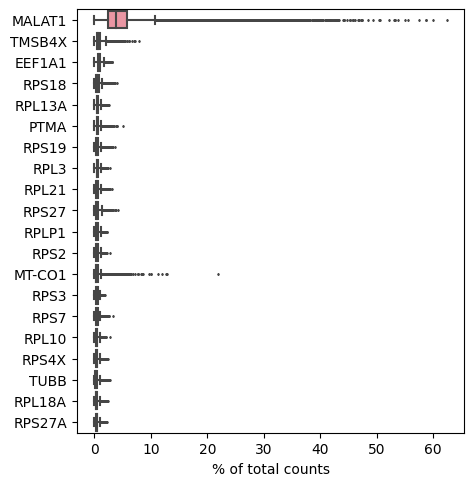

In [6]:
sc.pl.highest_expr_genes(adata_rb, n_top=20, )


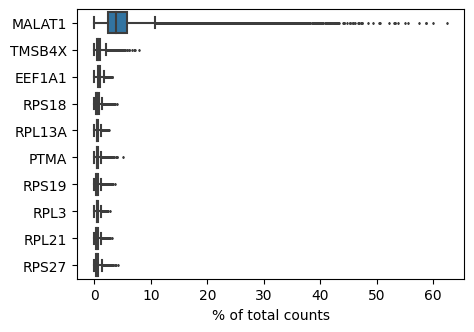

In [4]:
sc.pl.highest_expr_genes(adata_rb, n_top=10, )


In [3]:
sc.pp.filter_cells(adata_rb, min_genes=200)
sc.pp.filter_genes(adata_rb, min_cells=3)
adata_rb

AnnData object with n_obs × n_vars = 91555 × 24842
    obs: 'patient_id', 'sample_id', 'n_genes'
    var: 'n_cells'

In [4]:
adata_rb.var['mt'] = adata_rb.var_names.str.startswith('MT-')  # annotate the group of mitochondrial genes as 'mt'
sc.pp.calculate_qc_metrics(adata_rb, qc_vars=['mt'], percent_top=None, log1p=False, inplace=True)

c:\Users\charl\miniconda3\envs\MEDI7281\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


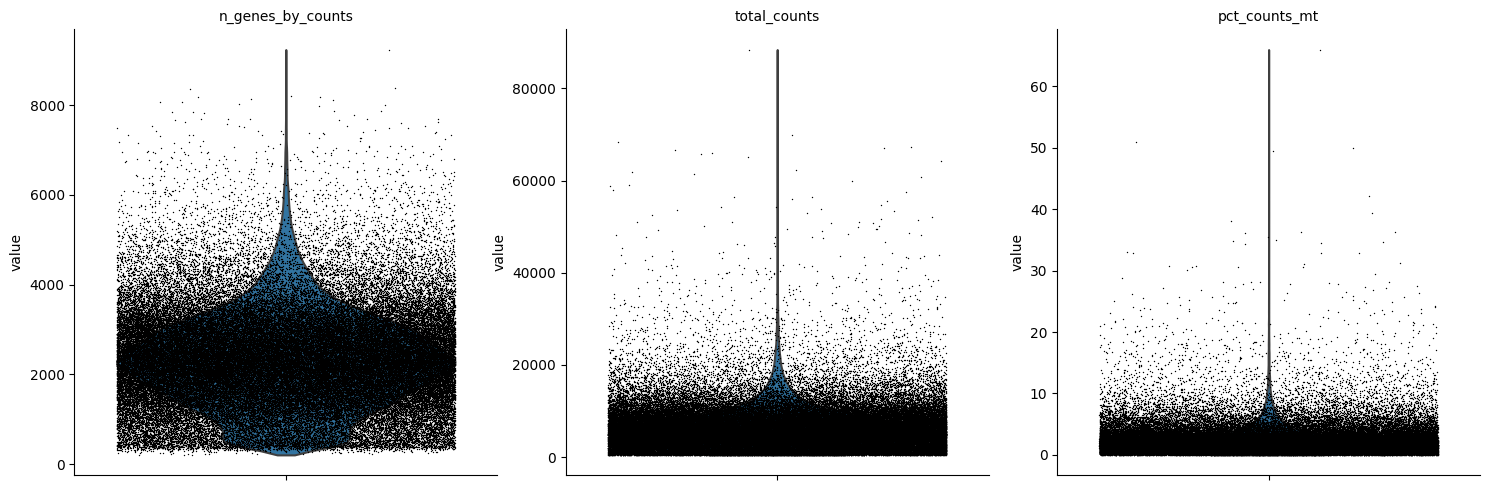

In [5]:
sc.pl.violin(adata_rb, ['n_genes_by_counts', 'total_counts', 'pct_counts_mt'], jitter=0.4, multi_panel=True)

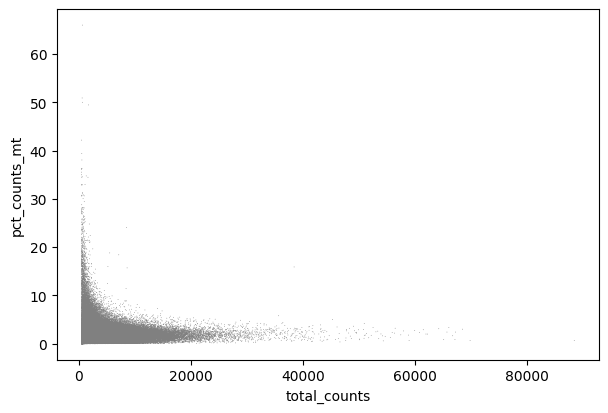

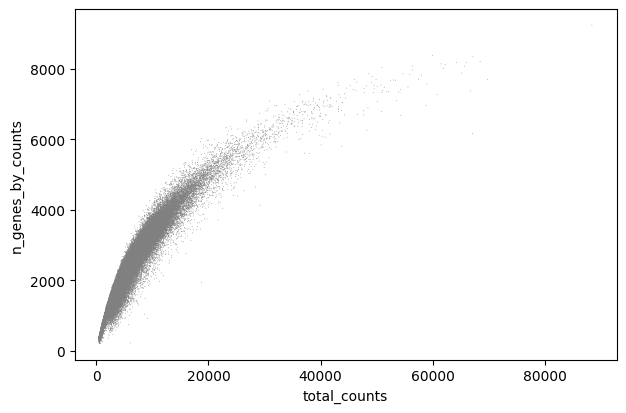

In [6]:
sc.pl.scatter(adata_rb, x='total_counts', y='pct_counts_mt')
sc.pl.scatter(adata_rb, x='total_counts', y='n_genes_by_counts')

In [7]:
# KT: i think based on your scatter above, we can up these numbers to 6000 and 10 respectively
adata_rb = adata_rb[adata_rb.obs.n_genes_by_counts < 6000, :]
adata_rb = adata_rb[adata_rb.obs.pct_counts_mt < 10, :]


In [8]:
sc.pp.normalize_total(adata_rb, target_sum=1e4)


c:\Users\charl\miniconda3\envs\MEDI7281\Lib\site-packages\scanpy\preprocessing\_normalization.py:170: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


In [9]:
sc.pp.log1p(adata_rb)


In [10]:
sc.pp.highly_variable_genes(adata_rb, min_mean=0.0125, max_mean=3, min_disp=0.5)


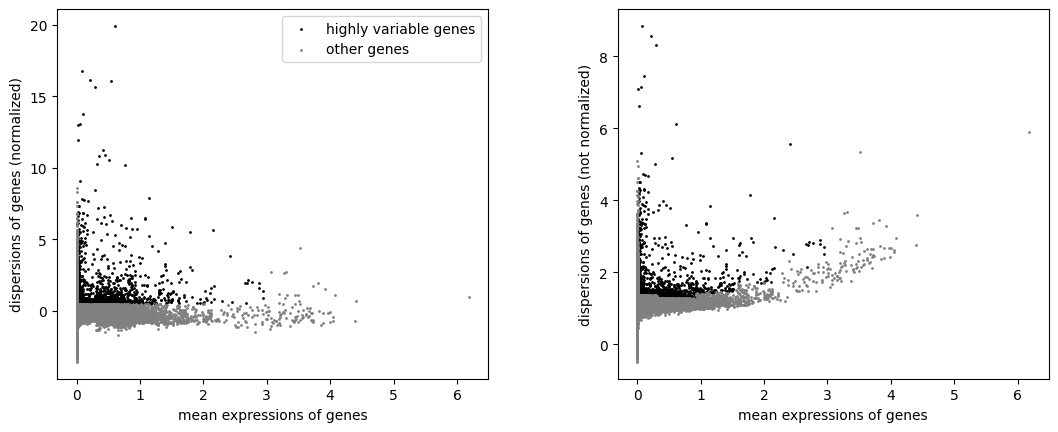

In [11]:
sc.pl.highly_variable_genes(adata_rb)


In [12]:
adata_rb.raw = adata_rb


In [13]:
adata_rb = adata_rb[:, adata_rb.var.highly_variable]


In [14]:
sc.pp.regress_out(adata_rb, ['total_counts', 'pct_counts_mt'])


In [15]:
sc.pp.scale(adata_rb, max_value=10)

In [16]:
sc.tl.pca(adata_rb, svd_solver='arpack')


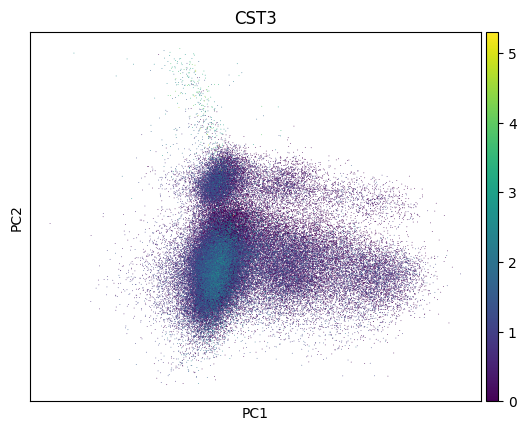

In [17]:
sc.pl.pca(adata_rb, color='CST3')


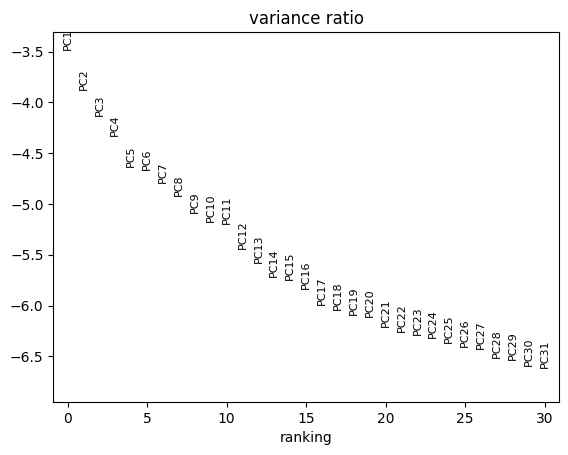

In [18]:
sc.pl.pca_variance_ratio(adata_rb, log=True)


In [19]:
import os 

In [20]:
!mkdir write

A subdirectory or file write already exists.


In [21]:
results_file = 'write/rb.h5ad'  # the file that will store the analysis results


In [22]:
adata_rb.write(results_file)


In [23]:
adata_rb

AnnData object with n_obs × n_vars = 89927 × 1393
    obs: 'patient_id', 'sample_id', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt'
    var: 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'log1p', 'hvg', 'pca'
    obsm: 'X_pca'
    varm: 'PCs'

In [24]:
sc.pp.neighbors(adata_rb, n_neighbors=10, n_pcs=40)

c:\Users\charl\miniconda3\envs\MEDI7281\Lib\site-packages\umap\distances.py:1063: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
c:\Users\charl\miniconda3\envs\MEDI7281\Lib\site-packages\umap\distances.py:1071: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
c:\Users\charl\miniconda3\envs\MEDI7281\Lib\site-packages\umap\distances.py:1086: 

In [25]:
pip install leidenalg

Note: you may need to restart the kernel to use updated packages.


In [26]:
import leidenalg as leiden

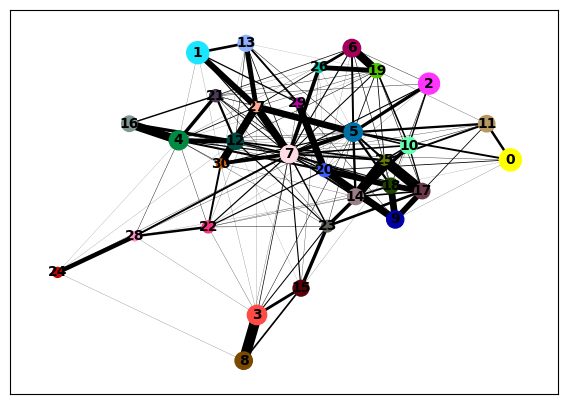

In [30]:
sc.tl.leiden(adata_rb)
sc.tl.paga(adata_rb)
sc.pl.paga(adata_rb) # remove `plot=False` if you want to see the coarse-grained graph
sc.tl.umap(adata_rb, init_pos='paga')

In [31]:
sc.tl.umap(adata_rb)


In [32]:
import scanpy as sc
import pandas as pd
import numpy as np 

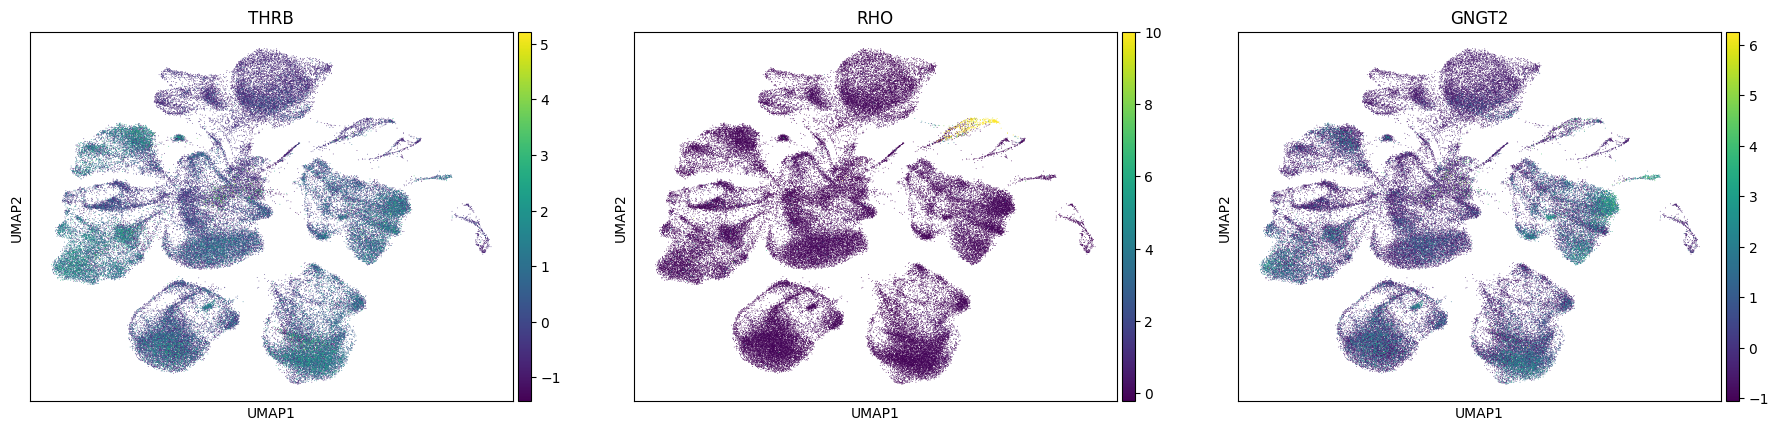

In [33]:
sc.pl.umap(adata_rb, color=['THRB', 'RHO', 'GNGT2'], use_raw=False)
# Not sure whether these are the optimal genes, is there a way to use groups of multiple genes? 
# am I supposed to just put normal retinal gene markers in this part?
# THRB = early cone marker ; RHO = mature rod marker; GNGT2 = mature cone marker 

c:\Users\charl\miniconda3\envs\MEDI7281\Lib\site-packages\scanpy\plotting\_tools\scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


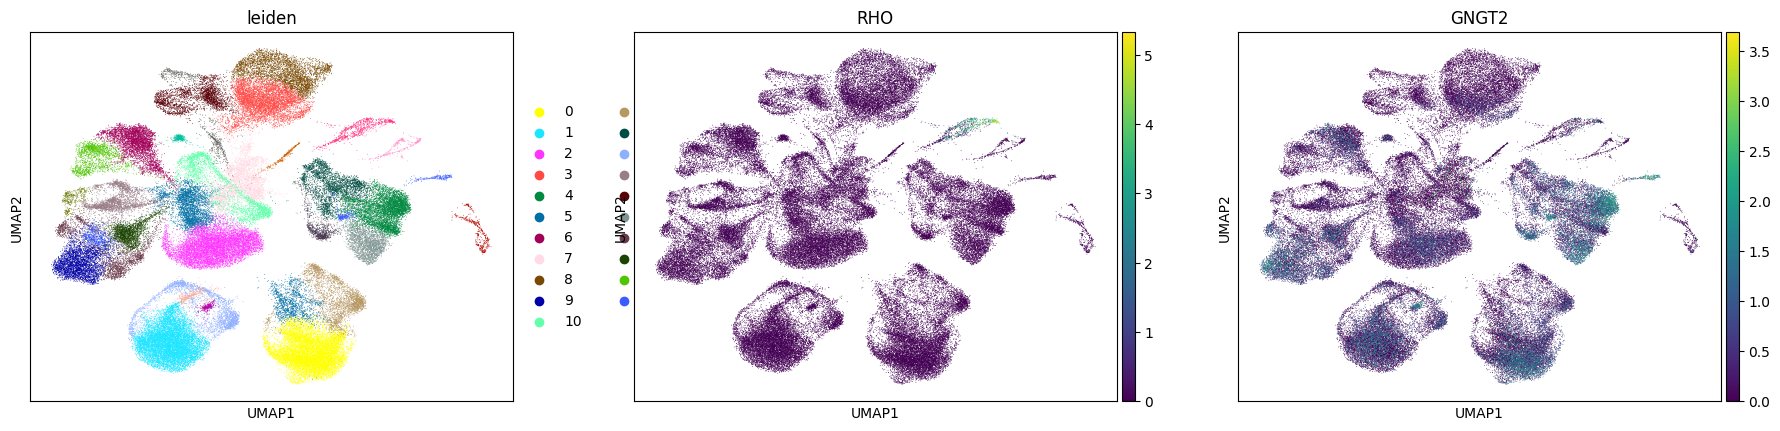

In [34]:
sc.pl.umap(adata_rb, color=['leiden', 'RHO', 'GNGT2'])
#same thing not sure whether these are the optimal genes to do so 

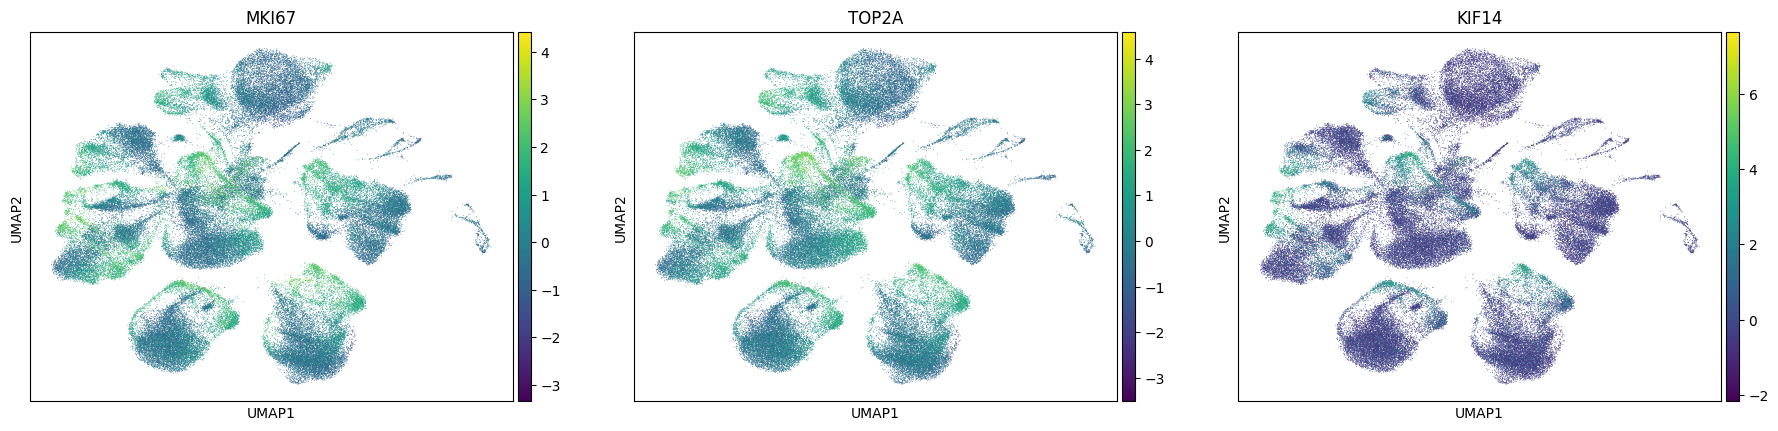

In [35]:
sc.pl.umap(adata_rb, color=['MKI67', 'TOP2A', 'KIF14'], use_raw=False)
#proliferation-related markers - tumour cells??

c:\Users\charl\miniconda3\envs\MEDI7281\Lib\site-packages\scanpy\plotting\_tools\scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
c:\Users\charl\miniconda3\envs\MEDI7281\Lib\site-packages\scanpy\plotting\_tools\scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
c:\Users\charl\miniconda3\envs\MEDI7281\Lib\site-packages\scanpy\plotting\_tools\scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


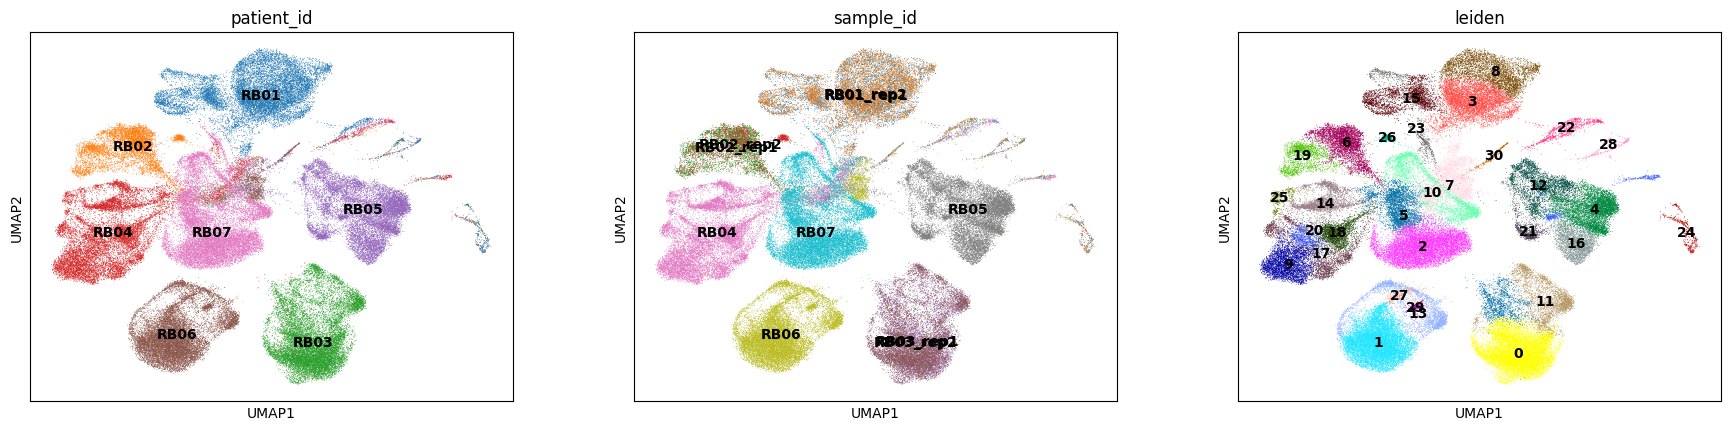

In [36]:
sc.pl.umap(adata_rb, color=['patient_id','sample_id', 'leiden'], legend_loc='on data')

c:\Users\charl\miniconda3\envs\MEDI7281\Lib\site-packages\scanpy\plotting\_tools\scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


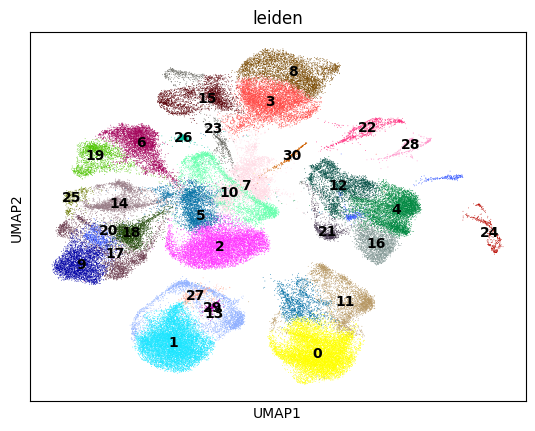

In [113]:
sc.pl.umap(adata_rb, color=['leiden'], legend_loc='on data')

In [ ]:
#how to define groups of genes as the same cell type
#gene_dictionary = {
    "immature_genes": ["CRX", "RXRG"]
    "rod_genes":["RHO", "PDE6A", "CNGA1"],
    "cone_genes":["ARR3", "GNGT2", "GUCA1C"],
    "rgc_genes": ["POU4F2", "NEFL", "SNCG", "ATOH7", "EBF3", "THY1", "NRN1", "GAP43"]
    "hc_genes": ["ONECUT1", "ONECUT2", "ONECUT3", "LHX1", "TFAP2B"]
    "bc_genes": ["VSX2", "VSX1", "TRPM1", "OTX2"]
    "ac_genes": ["GAD1", "CALB1", "NRXN2", "TFAP2A", "PROX", "CHAT"]
    "muller_genes": ["RLBP1", "CRALBP"]
    "astrocyte_genes": ["GFAP"]
    "microglia_genes": ["HLA-DPA1", "HLA-DPB1", "HLA-DRA"]
    }
#sc.pl.dotplot(adata_rb, gene_dictionary, groupby="leiden", cmap="Blues", standard_scale="var")

c:\Users\charl\miniconda3\envs\MEDI7281\Lib\site-packages\scanpy\plotting\_dotplot.py:749: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  dot_ax.scatter(x, y, **kwds)


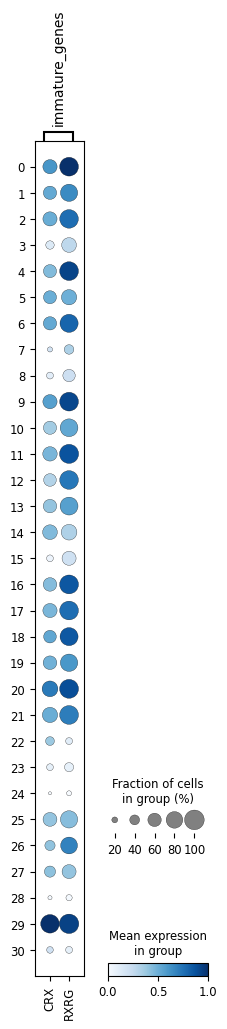

In [58]:
gene_dictionary = {
    "immature_genes": ["CRX", "RXRG"]}
sc.pl.dotplot(adata_rb, gene_dictionary, groupby="leiden", cmap="Blues", standard_scale="var")

c:\Users\charl\miniconda3\envs\MEDI7281\Lib\site-packages\scanpy\plotting\_dotplot.py:749: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  dot_ax.scatter(x, y, **kwds)


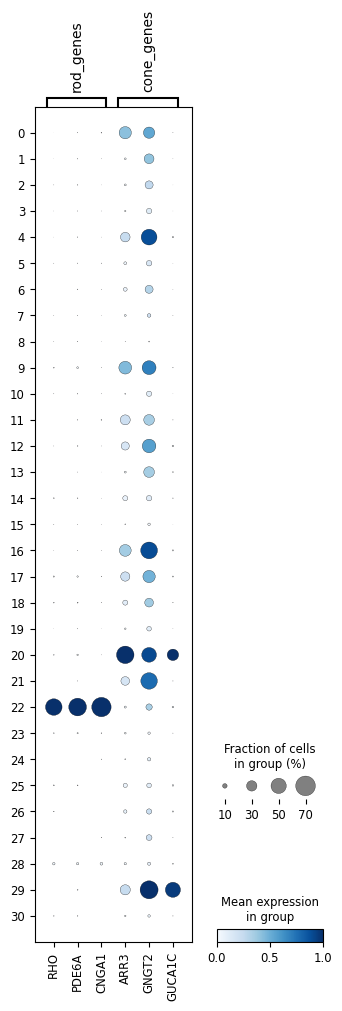

In [50]:
gene_dictionary = {
    "rod_genes":["RHO", "PDE6A", "CNGA1"],
    "cone_genes":["ARR3", "GNGT2", "GUCA1C"],
    }
sc.pl.dotplot(adata_rb, gene_dictionary, groupby="leiden", cmap="Blues", standard_scale="var")

In [55]:
import scanpy as sc

c:\Users\charl\miniconda3\envs\MEDI7281\Lib\site-packages\scanpy\plotting\_dotplot.py:749: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  dot_ax.scatter(x, y, **kwds)


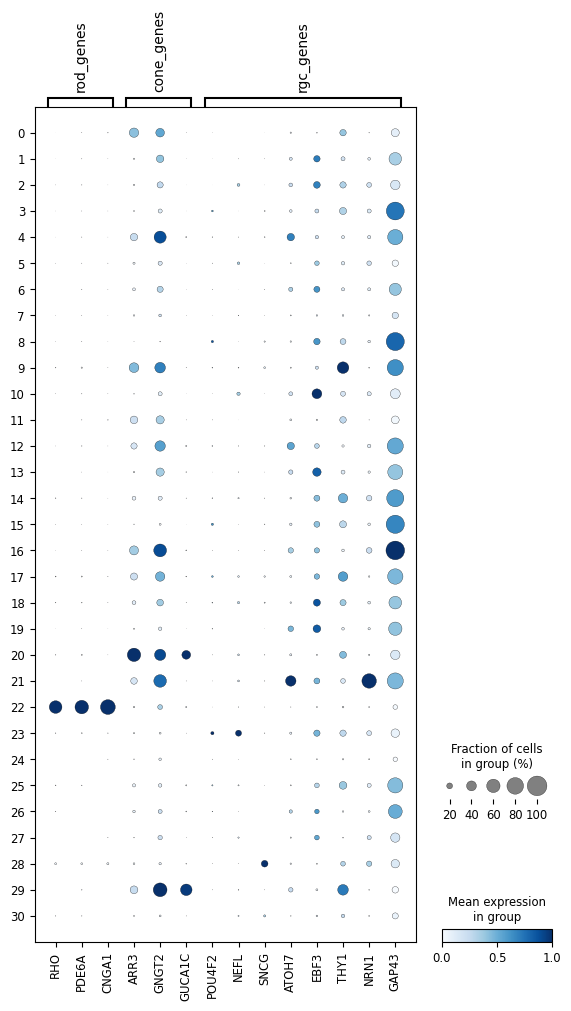

In [57]:
gene_dictionary = {
    "rod_genes":["RHO", "PDE6A", "CNGA1"],
    "cone_genes":["ARR3", "GNGT2", "GUCA1C"],
    "rgc_genes": ["POU4F2", "NEFL", "SNCG", "ATOH7", "EBF3", "THY1", "NRN1", "GAP43"]
}
sc.pl.dotplot(adata_rb, gene_dictionary, groupby="leiden", cmap="Blues", standard_scale="var")

c:\Users\charl\miniconda3\envs\MEDI7281\Lib\site-packages\scanpy\plotting\_dotplot.py:749: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  dot_ax.scatter(x, y, **kwds)


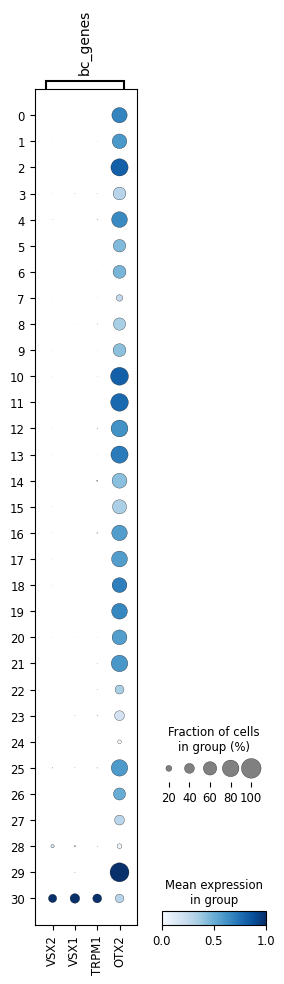

In [68]:
gene_dictionary = {
    "bc_genes": ["VSX2", "VSX1", "TRPM1", "OTX2"]
    }
sc.pl.dotplot(adata_rb, gene_dictionary, groupby="leiden", cmap="Blues", standard_scale="var")

c:\Users\charl\miniconda3\envs\MEDI7281\Lib\site-packages\scanpy\plotting\_dotplot.py:749: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  dot_ax.scatter(x, y, **kwds)


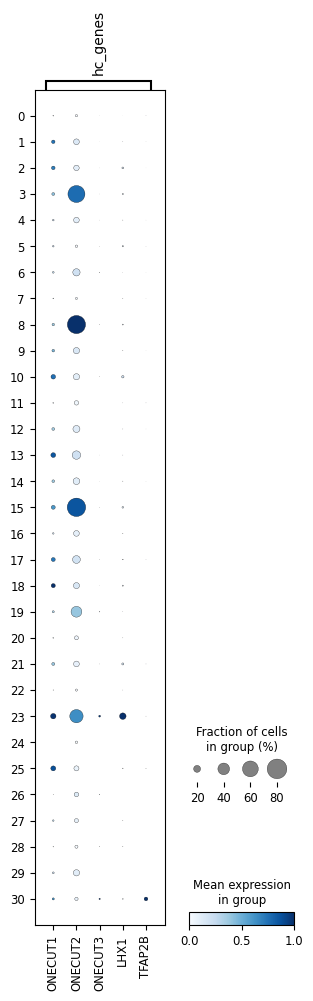

In [70]:
gene_dictionary = {
    "hc_genes": ["ONECUT1", "ONECUT2", "ONECUT3", "LHX1", "TFAP2B"]
    }
sc.pl.dotplot(adata_rb, gene_dictionary, groupby="leiden", cmap="Blues", standard_scale="var")

c:\Users\charl\miniconda3\envs\MEDI7281\Lib\site-packages\scanpy\plotting\_dotplot.py:749: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  dot_ax.scatter(x, y, **kwds)


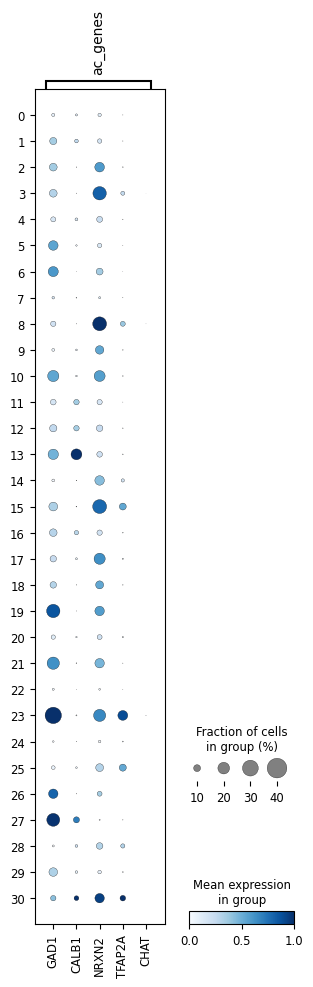

In [73]:
gene_dictionary = {
    "ac_genes": ["GAD1", "CALB1", "NRXN2", "TFAP2A", "CHAT"]
    }
sc.pl.dotplot(adata_rb, gene_dictionary, groupby="leiden", cmap="Blues", standard_scale="var")

c:\Users\charl\miniconda3\envs\MEDI7281\Lib\site-packages\scanpy\plotting\_dotplot.py:749: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  dot_ax.scatter(x, y, **kwds)


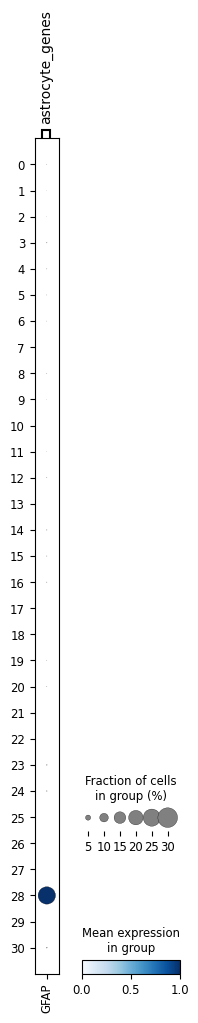

In [79]:
gene_dictionary = {
    "astrocyte_genes": ["GFAP"]}

sc.pl.dotplot(adata_rb, gene_dictionary, groupby="leiden", cmap="Blues", standard_scale="var")

c:\Users\charl\miniconda3\envs\MEDI7281\Lib\site-packages\scanpy\plotting\_dotplot.py:749: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  dot_ax.scatter(x, y, **kwds)


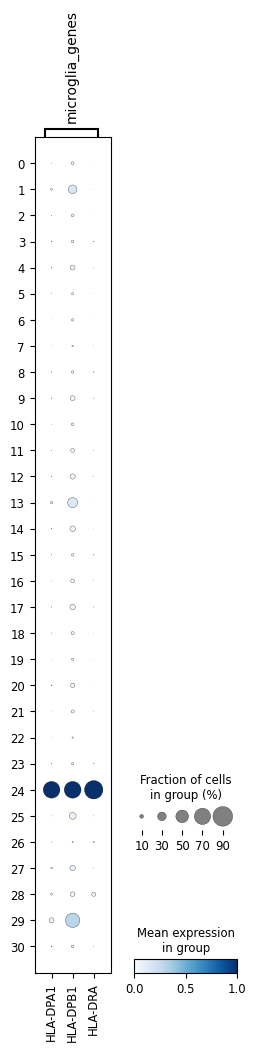

In [80]:
gene_dictionary = {
    "microglia_genes": ["HLA-DPA1", "HLA-DPB1", "HLA-DRA"]
    }
sc.pl.dotplot(adata_rb, gene_dictionary, groupby="leiden", cmap="Blues", standard_scale="var")

In [81]:
adata_rb.write(results_file)


c:\Users\charl\miniconda3\envs\MEDI7281\Lib\site-packages\scanpy\tools\_rank_genes_groups.py:394: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  self.stats[group_name, 'names'] = self.var_names[global_indices]
c:\Users\charl\miniconda3\envs\MEDI7281\Lib\site-packages\scanpy\tools\_rank_genes_groups.py:396: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  self.stats[group_name, 'scores'] = scores[global_indices]
c:\Users\charl\miniconda3\envs\MEDI7281\Lib\site-packages\scanpy\tools\_rank_genes_groups.py:399: PerformanceWarning: DataF

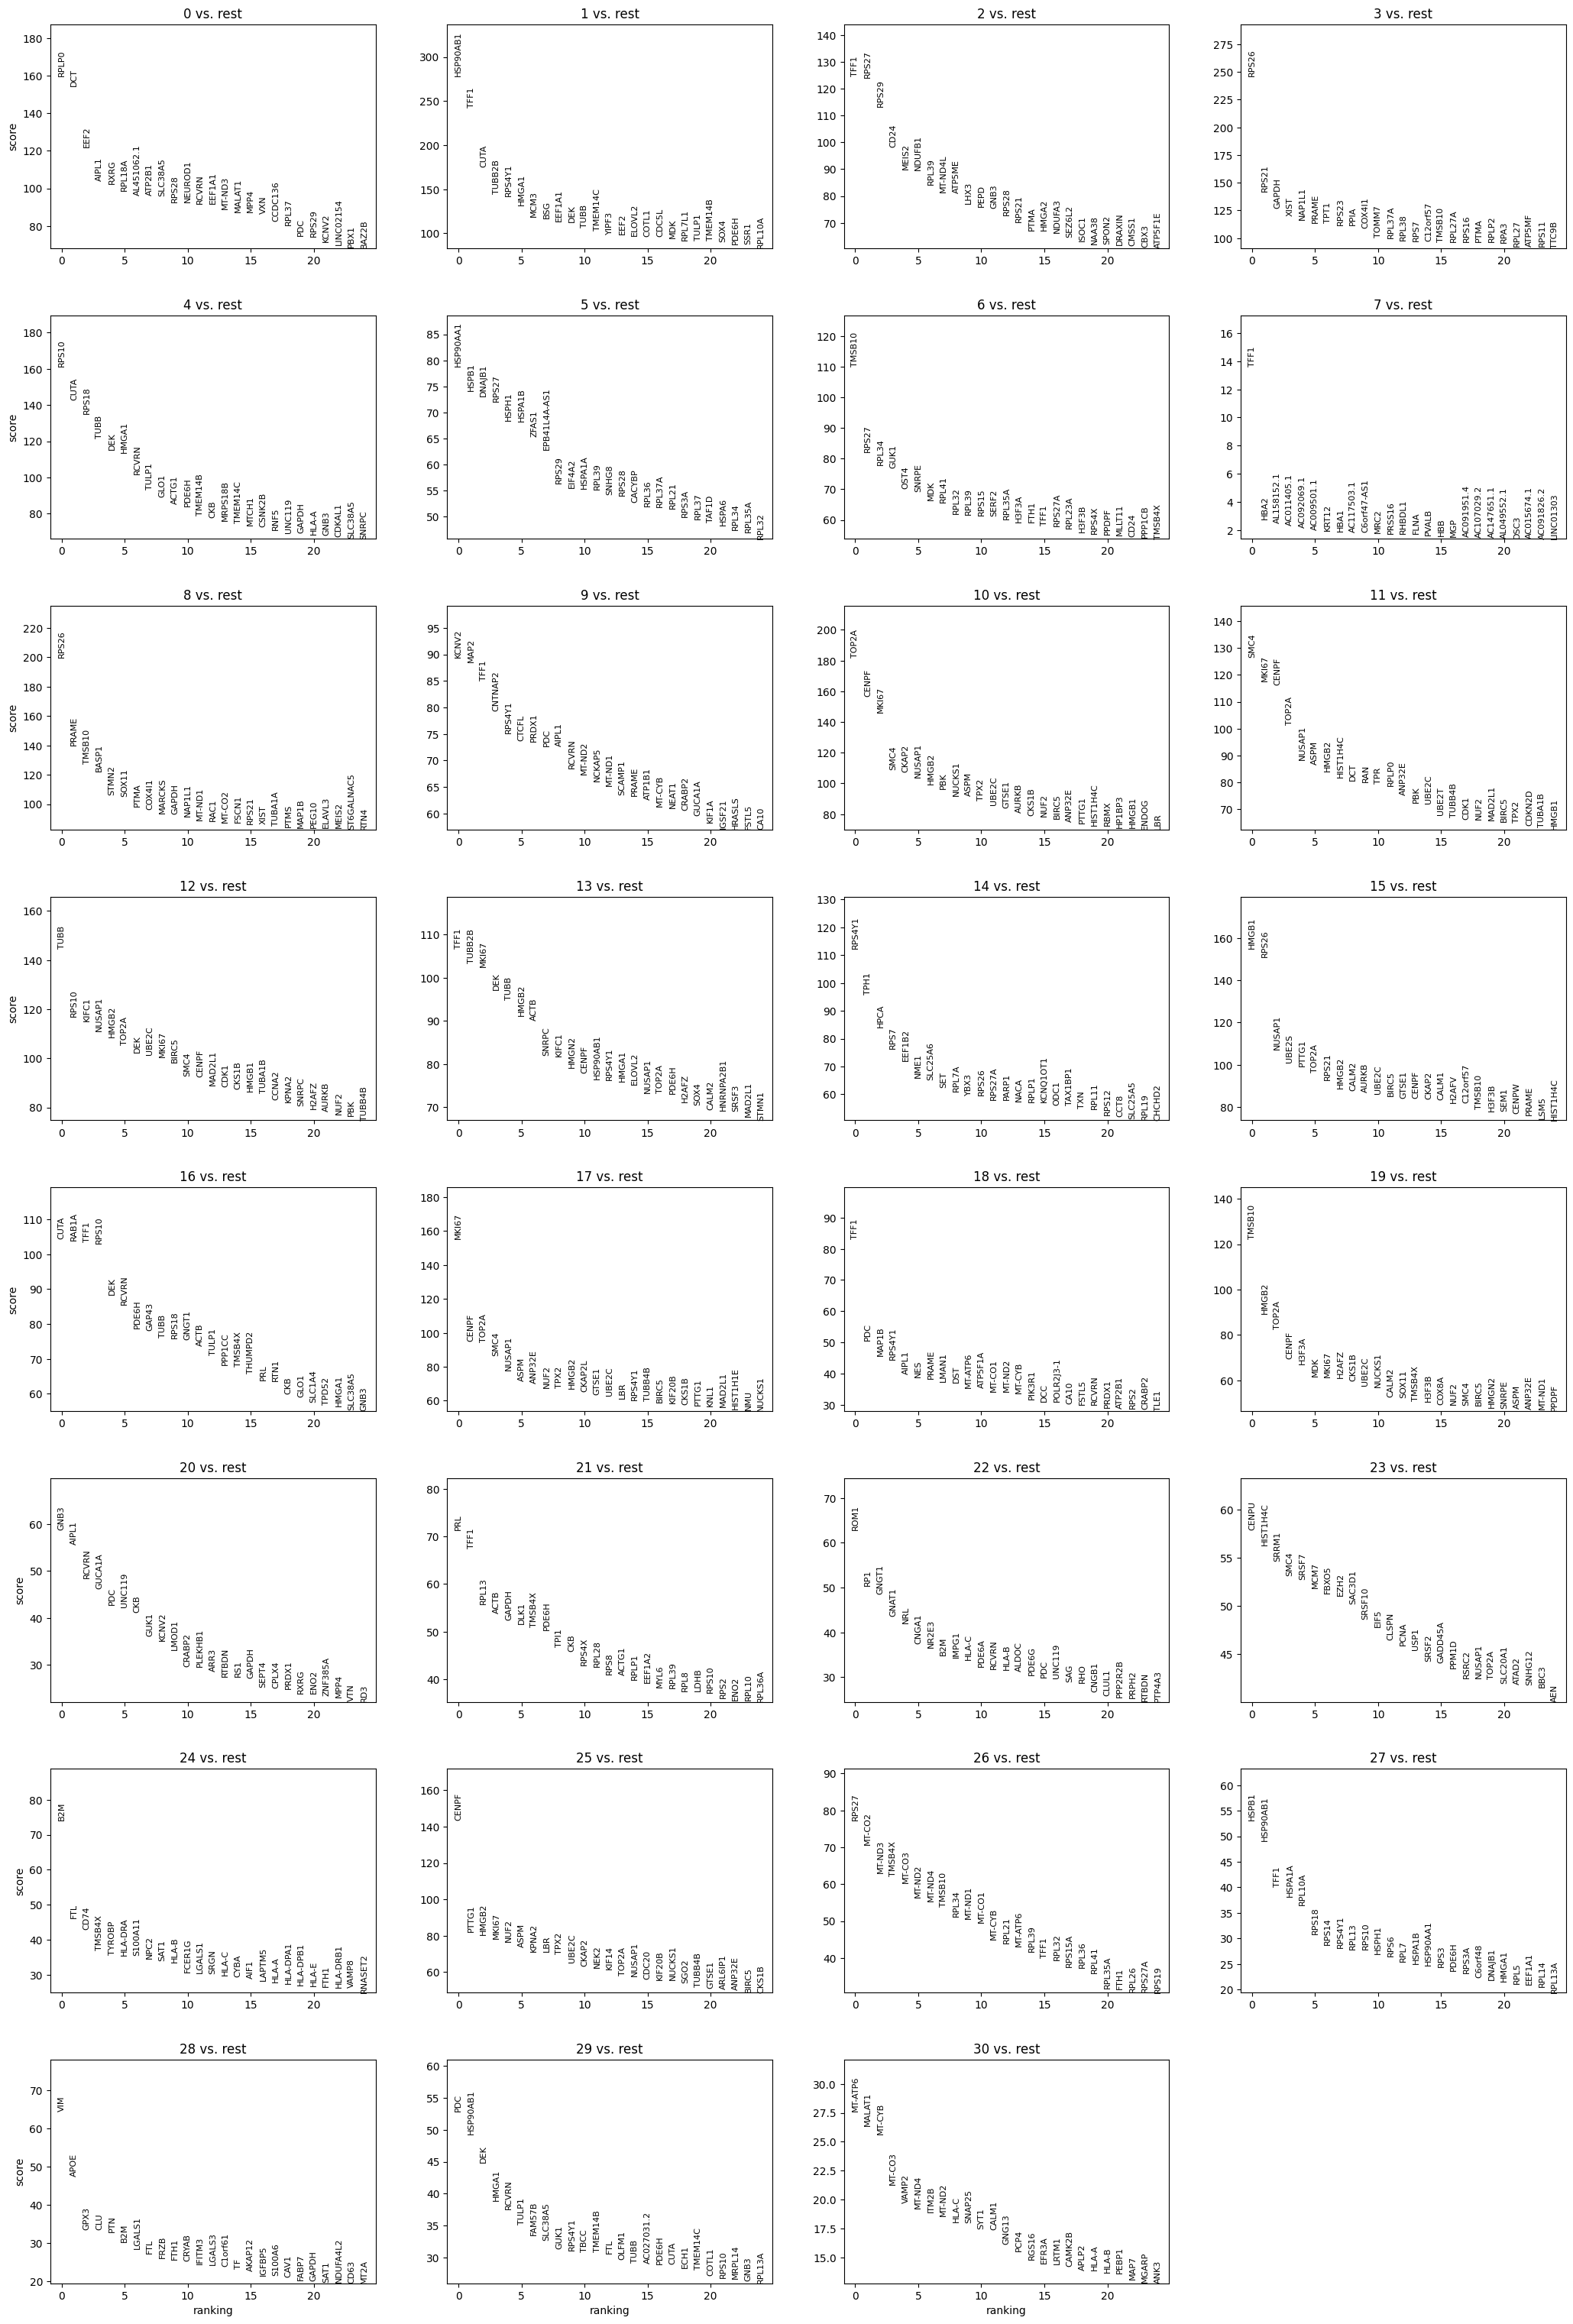

In [38]:
sc.tl.rank_genes_groups(adata_rb , 'leiden', method='t-test')
sc.pl.rank_genes_groups(adata_rb , n_genes=25, sharey=False)

ranking genes


c:\Users\charl\miniconda3\envs\MEDI7281\Lib\site-packages\scanpy\tools\_rank_genes_groups.py:394: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  self.stats[group_name, 'names'] = self.var_names[global_indices]
c:\Users\charl\miniconda3\envs\MEDI7281\Lib\site-packages\scanpy\tools\_rank_genes_groups.py:396: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  self.stats[group_name, 'scores'] = scores[global_indices]
c:\Users\charl\miniconda3\envs\MEDI7281\Lib\site-packages\scanpy\tools\_rank_genes_groups.py:399: PerformanceWarning: DataF

    finished (0:50:02)


c:\Users\charl\miniconda3\envs\MEDI7281\Lib\site-packages\scanpy\tools\_rank_genes_groups.py:399: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  self.stats[group_name, 'pvals'] = pvals[global_indices]
c:\Users\charl\miniconda3\envs\MEDI7281\Lib\site-packages\scanpy\tools\_rank_genes_groups.py:409: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  self.stats[group_name, 'pvals_adj'] = pvals_adj[global_indices]
c:\Users\charl\miniconda3\envs\MEDI7281\Lib\site-packages\scanpy\tools\_rank_genes_groups.py:420: PerformanceWarning: DataFram

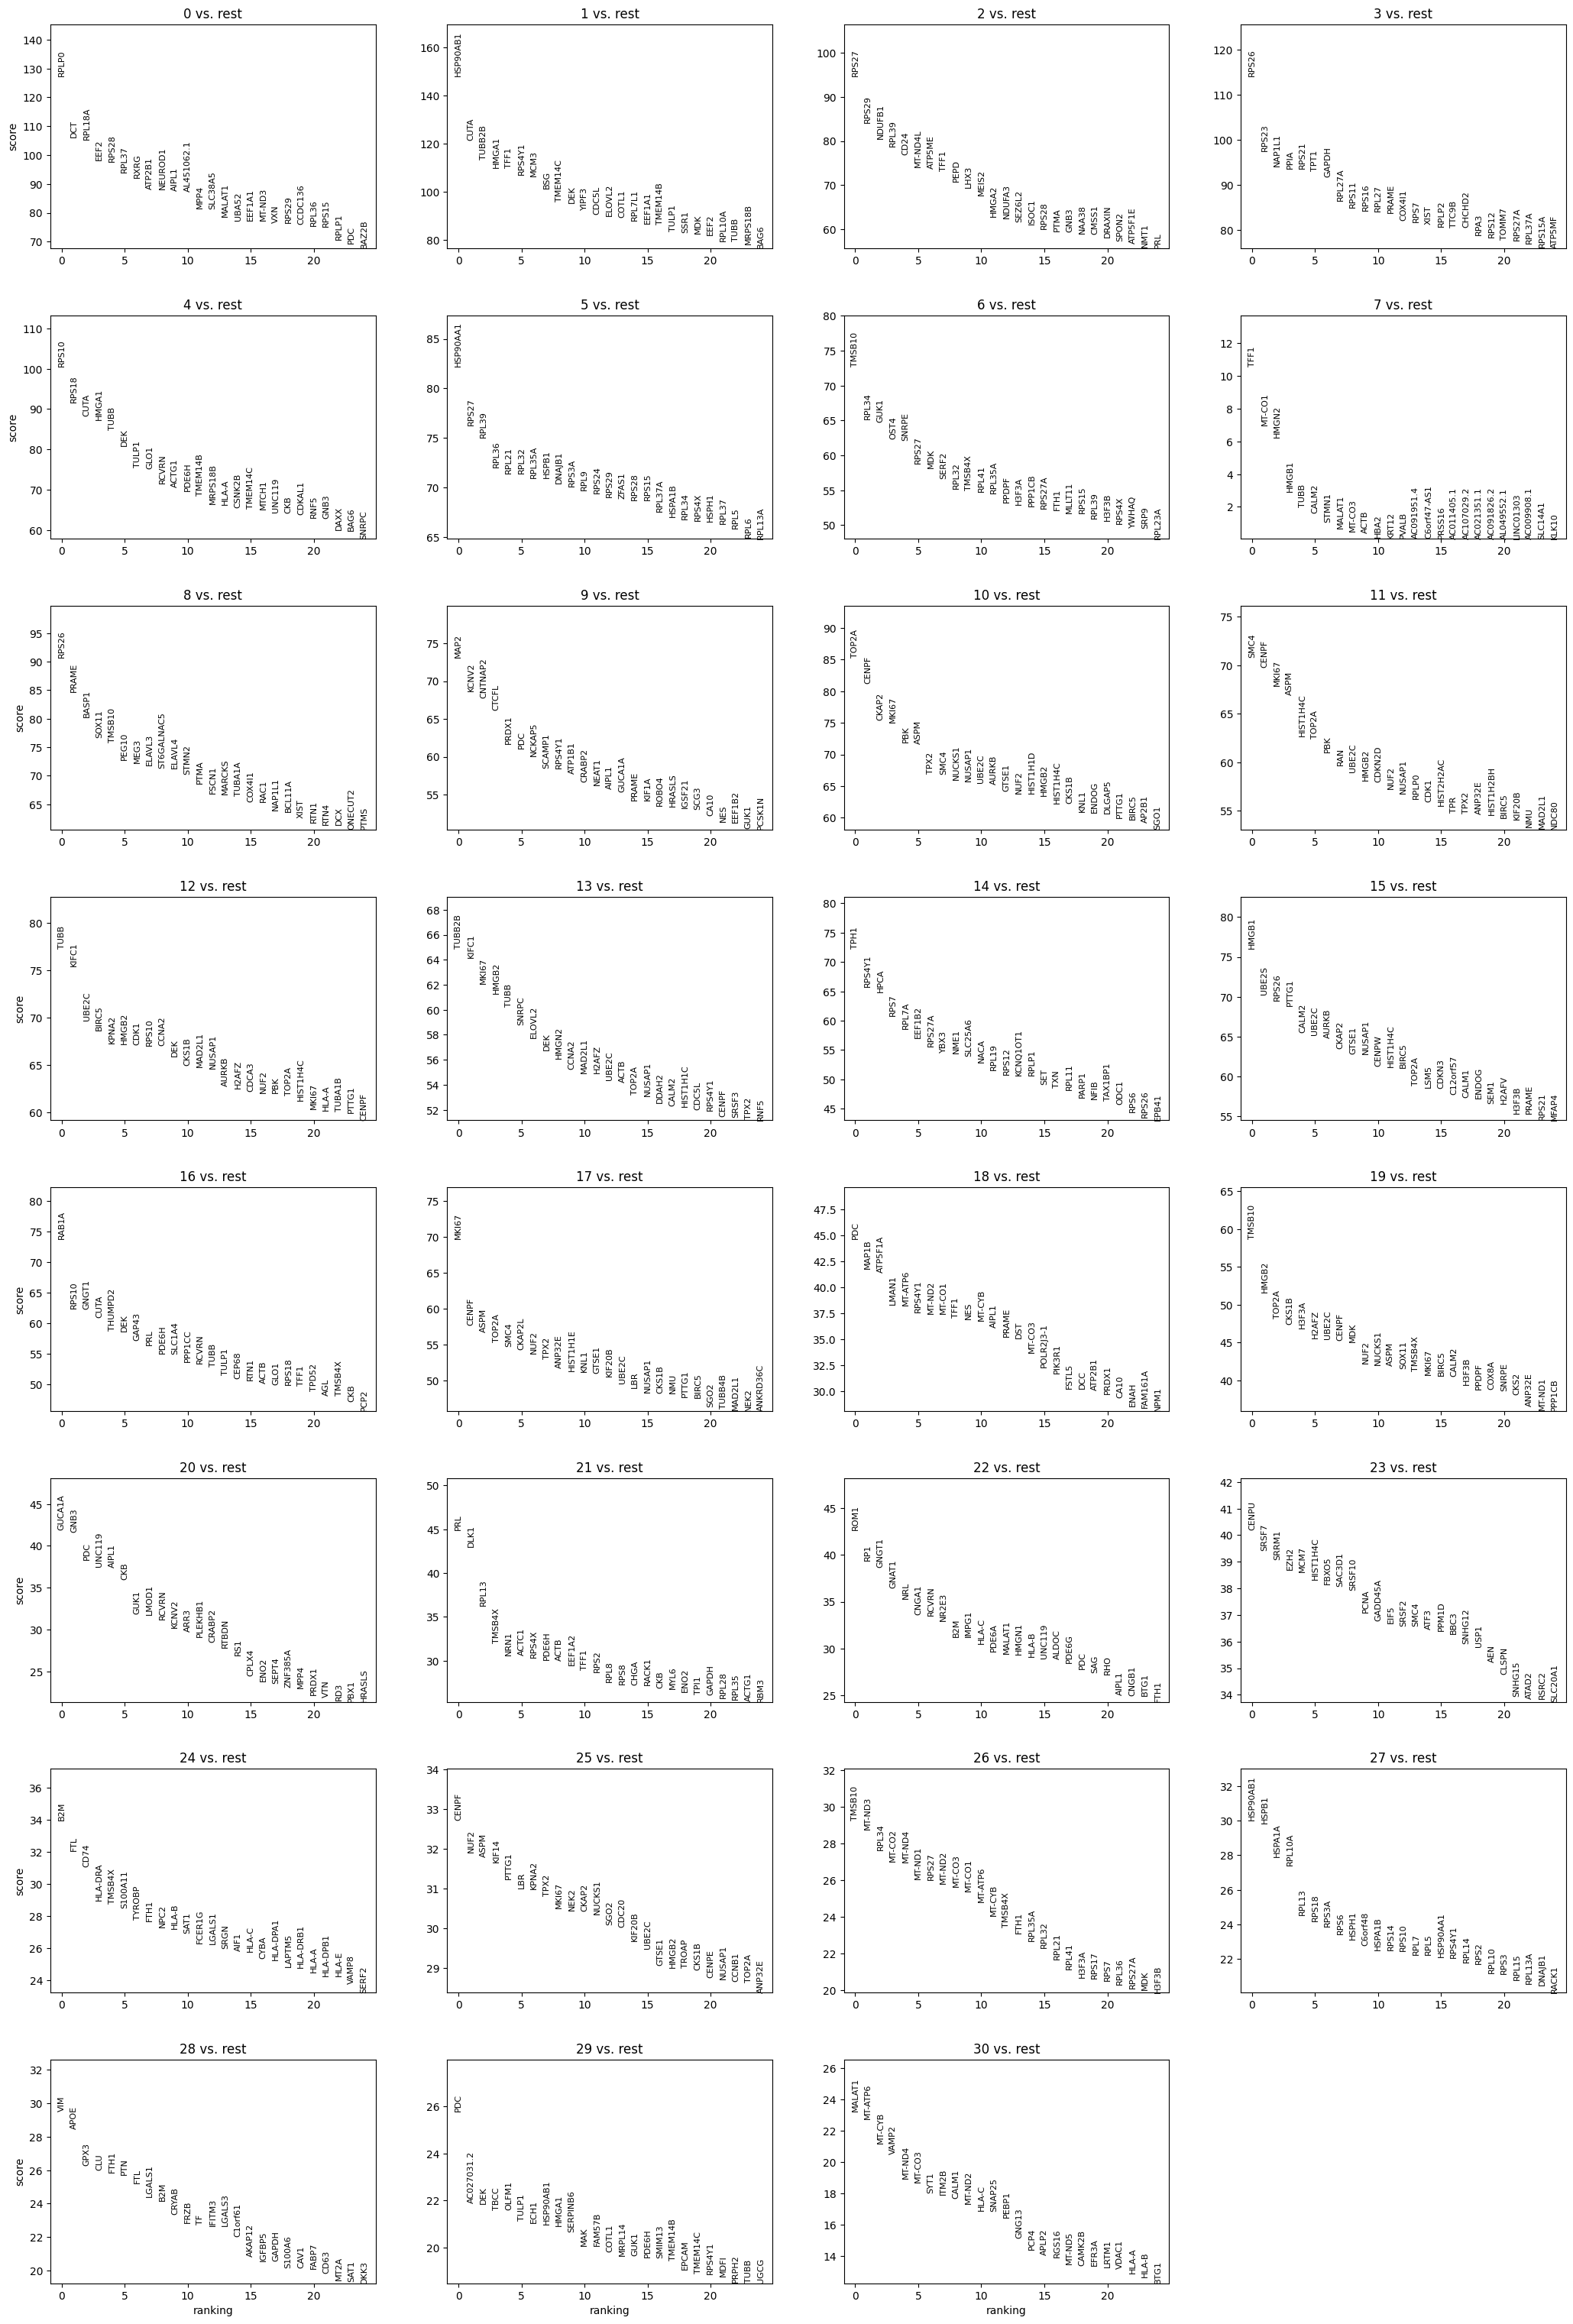

In [39]:
sc.settings.verbosity = 2  # reduce the verbosity
sc.tl.rank_genes_groups(adata_rb, 'leiden', method='wilcoxon')
sc.pl.rank_genes_groups(adata_rb, n_genes=25, sharey=False)

In [40]:
adata_rb.write(results_file)


ranking genes


c:\Users\charl\miniconda3\envs\MEDI7281\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


    finished (0:25:52)


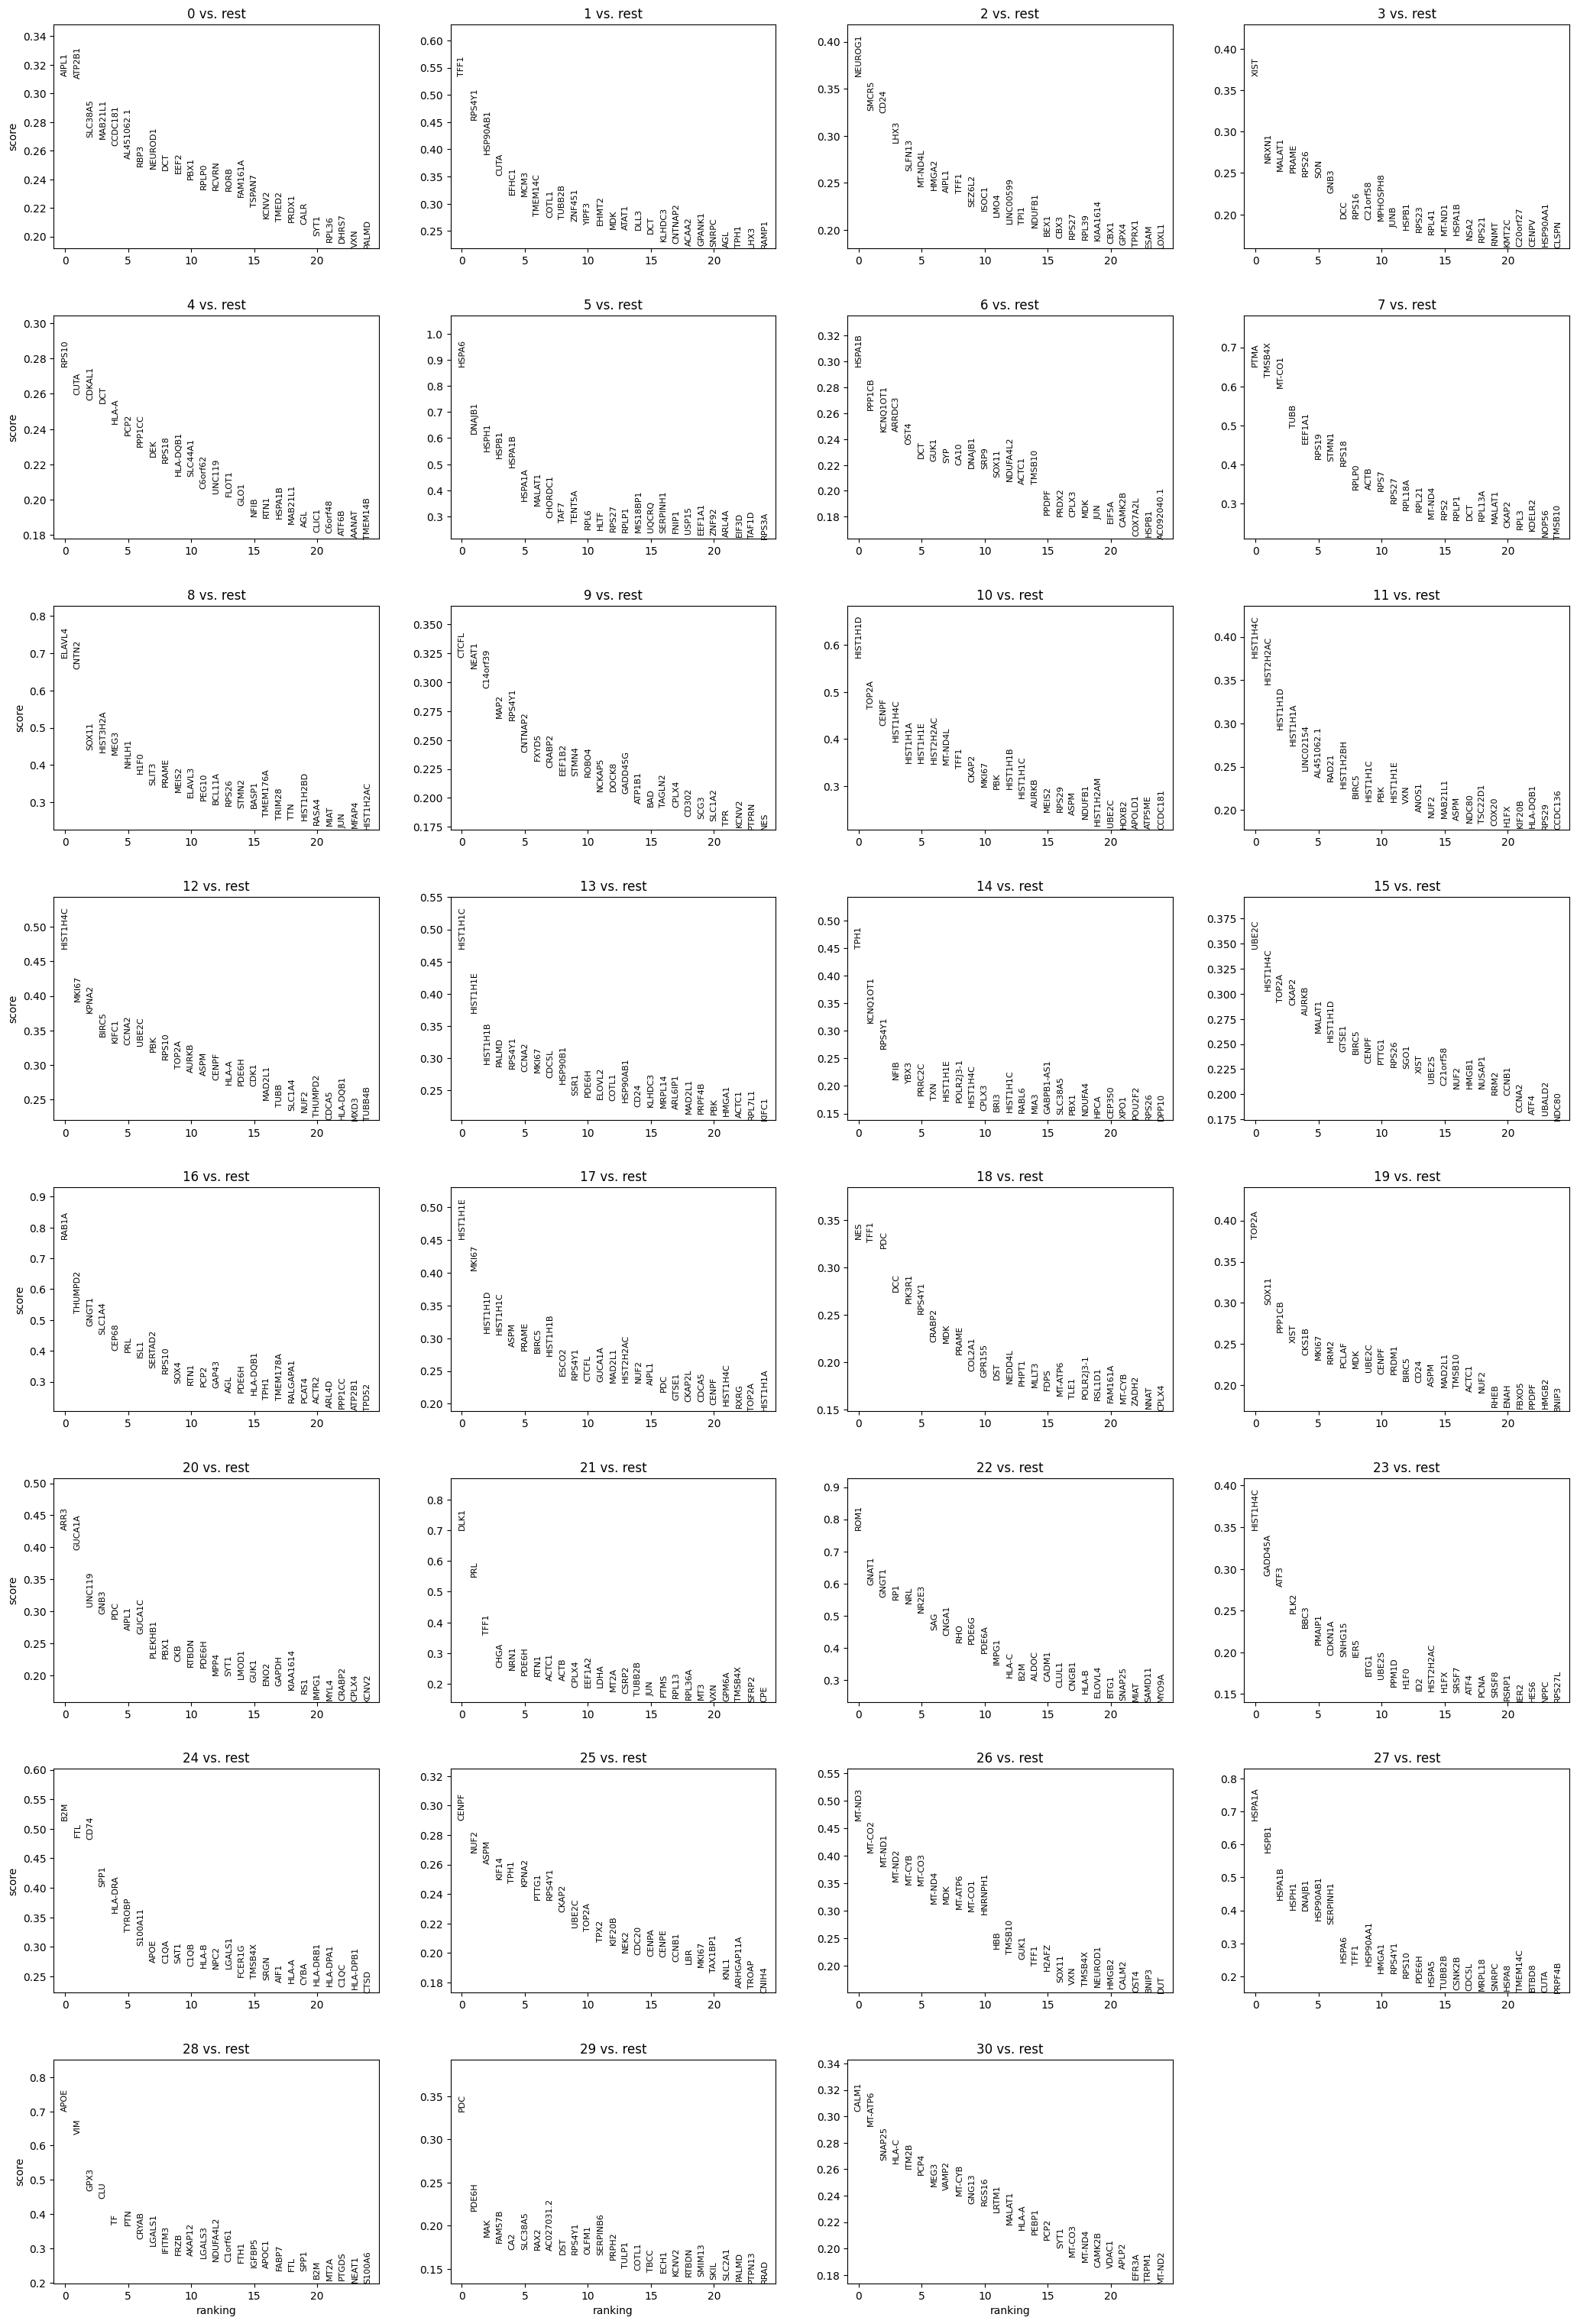

In [41]:
sc.tl.rank_genes_groups(adata_rb, 'leiden', method='logreg')
sc.pl.rank_genes_groups(adata_rb, n_genes=25, sharey=False)

In [ ]:
#scanpy tute defines a list of marker_genes 
#marker_genes = ['IL7R', 'CD79A', 'MS4A1', 'CD8A', 'CD8B', 'LYZ', 'CD14',
                'LGALS3', 'S100A8', 'GNLY', 'NKG7', 'KLRB1',
                'FCGR3A', 'MS4A7', 'FCER1A', 'CST3', 'PPBP']
# not sure how to define that - currently researching marker genes related to retina, 
# do i only define markers related to healthy retina?
# this data set also has way more groups than the scanpy tute 

In [82]:
marker_genes =['CRX', 'RXRG',
               'RHO', 'PDE6A', 'CNGA1', 
               'ARR3', 'GNGT2', 'GUCA1C', 
               'POU4F2', 'NEFL', 'SNCG', 'ATOH7', 'EBF3', 'THY1', 'NRN1', 'GAP43'
               'VSX2', 'VSX1', 'TRPM1', 'OTX2',
               'ONECUT1', 'ONECUT2', 'ONECUT3', 'LHX1', 'TFAP2B'
               'GAD1', 'CALB1', 'NRXN2', 'TFAP2A', 'PROX', 'CHAT'
               'RLBP1', 'CRALBP',
               'GFAP'
               'HLA-DPA1', 'HLA-DPB1', 'HLA-DRA']

In [83]:
adata_result = sc.read(results_file)

In [84]:
print (adata_result)

AnnData object with n_obs × n_vars = 89927 × 1393
    obs: 'patient_id', 'sample_id', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'leiden'
    var: 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'hvg', 'leiden', 'leiden_colors', 'leiden_sizes', 'log1p', 'neighbors', 'paga', 'patient_id_colors', 'pca', 'rank_genes_groups', 'sample_id_colors', 'umap'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    obsp: 'connectivities', 'distances'


In [85]:
pd.DataFrame(adata_result.uns['rank_genes_groups']['names']).head(5)


0         1        2       3       4       5         6       7  \
0    AIPL1      TFF1  NEUROG1    XIST   RPS10   HSPA6    HSPA1B    PTMA   
1   ATP2B1    RPS4Y1    SMCR5   NRXN1    CUTA  DNAJB1    PPP1CB  TMSB4X   
2  SLC38A5  HSP90AB1     CD24  MALAT1  CDKAL1   HSPH1  KCNQ1OT1  MT-CO1   
3  MAB21L1      CUTA     LHX3   PRAME     DCT   HSPB1    ARRDC3    TUBB   
4  CCDC181     EFHC1   SLFN13   RPS26   HLA-A  HSPA1B      OST4  EEF1A1   

          8         9  ...    21     22        23       24     25      26  \
0    ELAVL4     CTCFL  ...  DLK1   ROM1  HIST1H4C      B2M  CENPF  MT-ND3   
1     CNTN2     NEAT1  ...   PRL  GNAT1   GADD45A      FTL   NUF2  MT-CO2   
2     SOX11  C14orf39  ...  TFF1  GNGT1      ATF3     CD74   ASPM  MT-ND1   
3  HIST3H2A      MAP2  ...  CHGA    RP1      PLK2     SPP1  KIF14  MT-ND2   
4      MEG3    RPS4Y1  ...  NRN1    NRL      BBC3  HLA-DRA   TPH1  MT-CYB   

       27    28      29       30  
0  HSPA1A  APOE     PDC    CALM1  
1   HSPB1   VIM   PDE6H  MT-ATP6  
2  HSPA1B  GPX3     MAK   SNAP25  
3   HSPH1   CLU  FAM57B    HLA-C  
4  DNAJB1    TF     CA2    ITM2B  

[5 rows x 31 columns]

In [89]:
result = adata_result.uns['rank_genes_groups']
groups = result['names'].dtype.names
pd.DataFrame(
    {group + '_' + key[:1]: result[key][group]
    for group in groups for key in ['names', 'scores']}).head(5)

0_n       0_s       1_n       1_s      2_n       2_s     3_n       3_s  \
0    AIPL1  0.312158      TFF1  0.534686  NEUROG1  0.363493    XIST  0.367160   
1   ATP2B1  0.310459    RPS4Y1  0.454054    SMCR5  0.327062   NRXN1  0.262873   
2  SLC38A5  0.269169  HSP90AB1  0.391493     CD24  0.324063  MALAT1  0.252477   
3  MAB21L1  0.268251      CUTA  0.352042     LHX3  0.292913   PRAME  0.250917   
4  CCDC181  0.263383     EFHC1  0.317368   SLFN13  0.262972   RPS26  0.246212   

      4_n       4_s  ...    26_n      26_s    27_n      27_s  28_n      28_s  \
0   RPS10  0.275346  ...  MT-ND3  0.463986  HSPA1A  0.672146  APOE  0.700227   
1    CUTA  0.259298  ...  MT-CO2  0.406725   HSPB1  0.575476   VIM  0.634217   
2  CDKAL1  0.256524  ...  MT-ND1  0.380605  HSPA1B  0.433203  GPX3  0.467941   
3     DCT  0.254730  ...  MT-ND2  0.353248   HSPH1  0.403105   CLU  0.446888   
4   HLA-A  0.243196  ...  MT-CYB  0.348442  DNAJB1  0.399526    TF  0.369208   

     29_n      29_s     30_n      30_s  
0     PDC  0.332735    CALM1  0.303813  
1   PDE6H  0.217153  MT-ATP6  0.292643  
2     MAK  0.187068   SNAP25  0.267064  
3  FAM57B  0.180625    HLA-C  0.264371  
4     CA2  0.172406    ITM2B  0.260157  

[5 rows x 62 columns]

In [90]:
adata_result.uns['log1p']["base"] = None 
#googled how to fix key error 'base' for sc.tl.rank_genes_groups command

ranking genes
    finished (0:02:25)


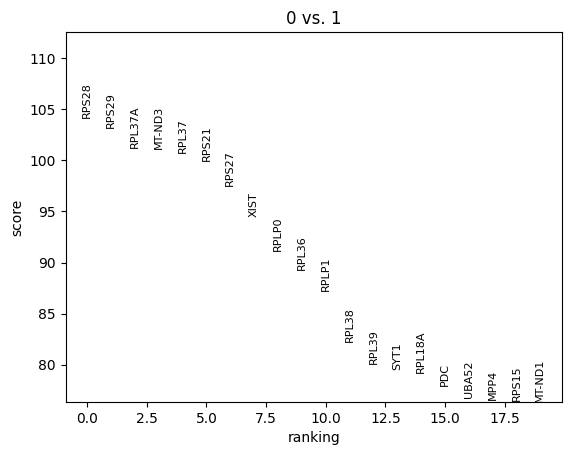

In [91]:
sc.tl.rank_genes_groups(adata_result, 'leiden', groups=['0'], reference='1', method='wilcoxon')
sc.pl.rank_genes_groups(adata_result, groups=['0'], n_genes=20)
#key error 'base' came up the first time this was run 

c:\Users\charl\miniconda3\envs\MEDI7281\Lib\site-packages\seaborn\categorical.py:166: FutureWarning: Setting a gradient palette using color= is deprecated and will be removed in version 0.13. Set `palette='dark:black'` for same effect.
  warnings.warn(msg, FutureWarning)


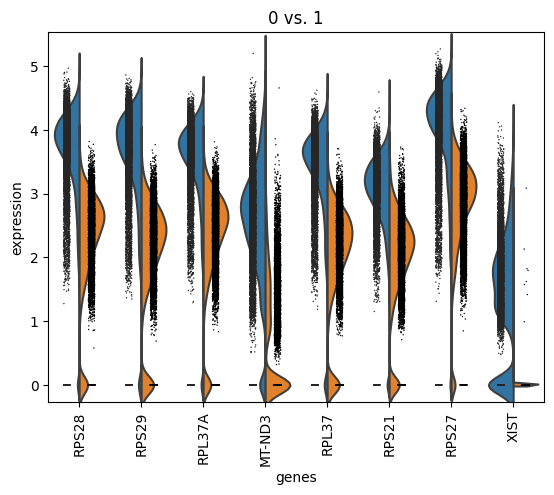

In [92]:
sc.pl.rank_genes_groups_violin(adata_result, groups='0', n_genes=8)


In [93]:
adata = sc.read(results_file)


c:\Users\charl\miniconda3\envs\MEDI7281\Lib\site-packages\seaborn\categorical.py:166: FutureWarning: Setting a gradient palette using color= is deprecated and will be removed in version 0.13. Set `palette='dark:black'` for same effect.
  warnings.warn(msg, FutureWarning)


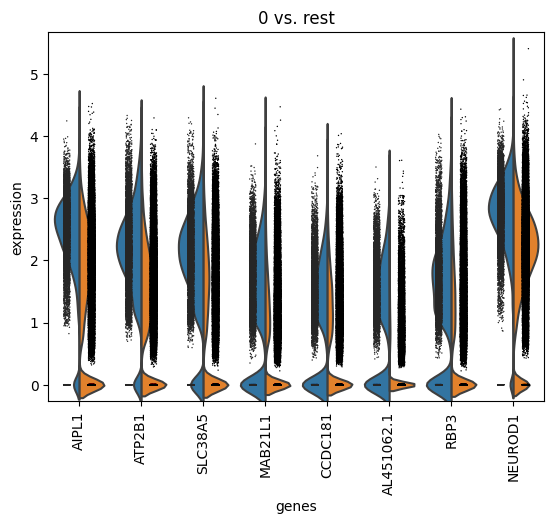

In [94]:
sc.pl.rank_genes_groups_violin(adata, groups='0', n_genes=8)


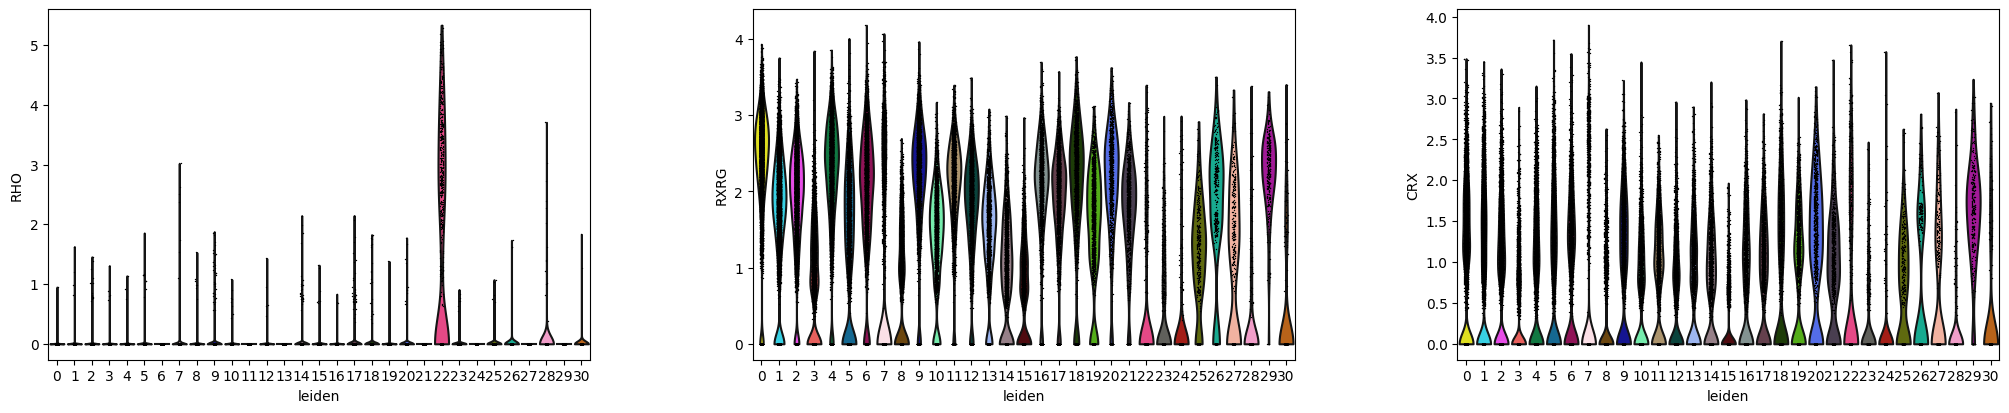

In [100]:
sc.pl.violin(adata, ['RHO', 'RXRG', 'CRX'], groupby='leiden')

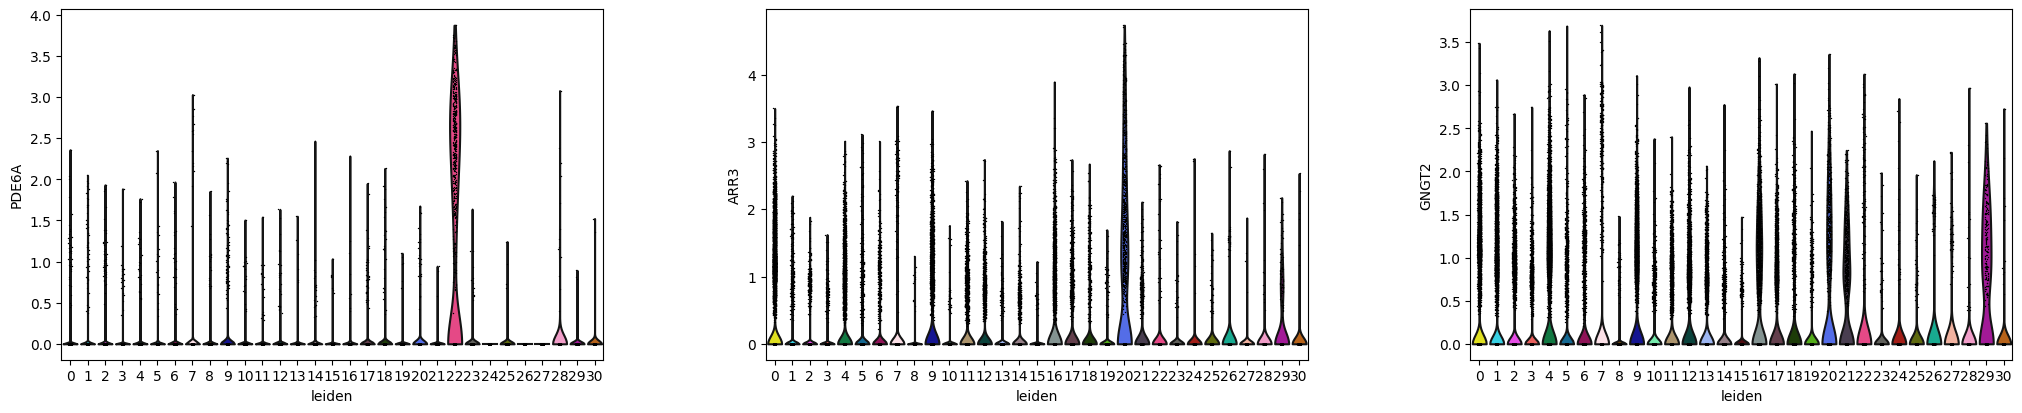

In [101]:
sc.pl.violin(adata, ['PDE6A', 'ARR3', 'GNGT2'], groupby='leiden')

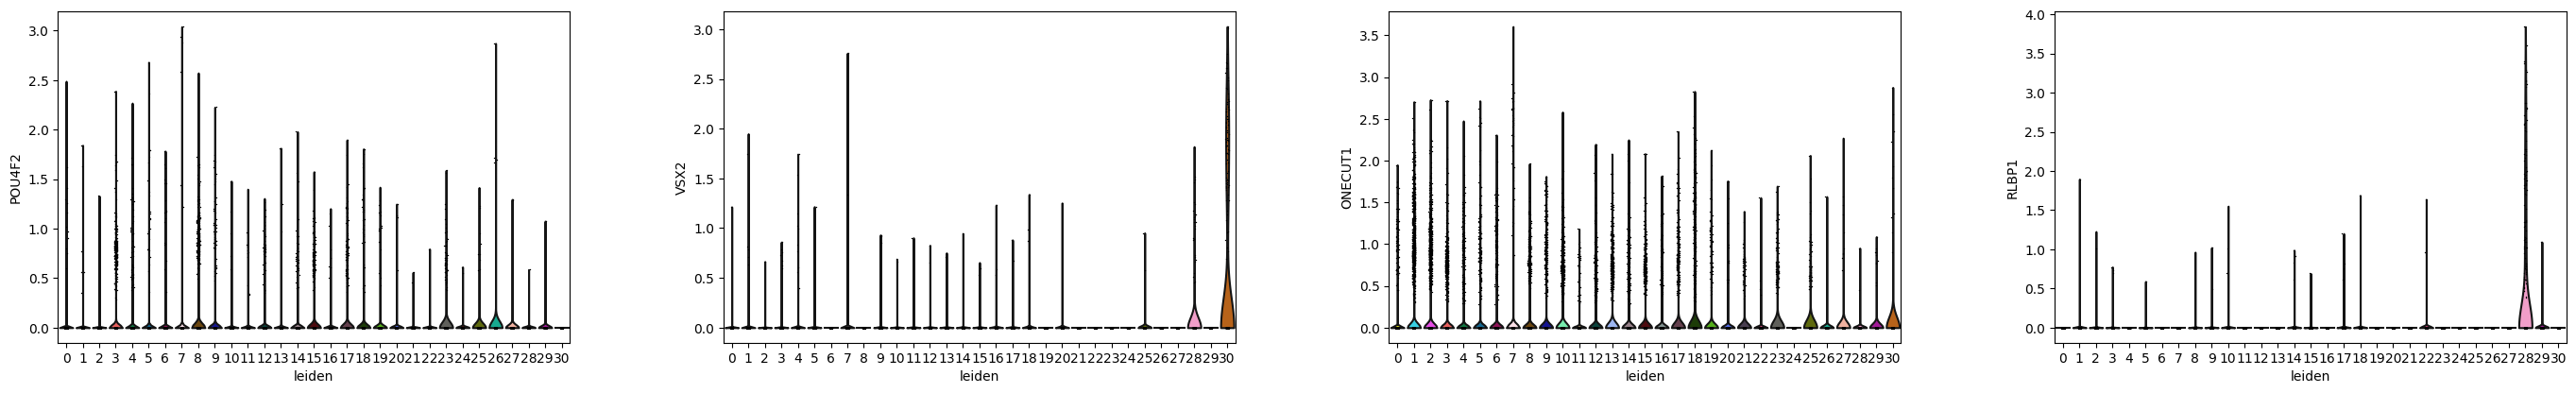

In [103]:
sc.pl.violin(adata, ['POU4F2', 'VSX2', 'ONECUT1', 'RLBP1'], groupby='leiden')

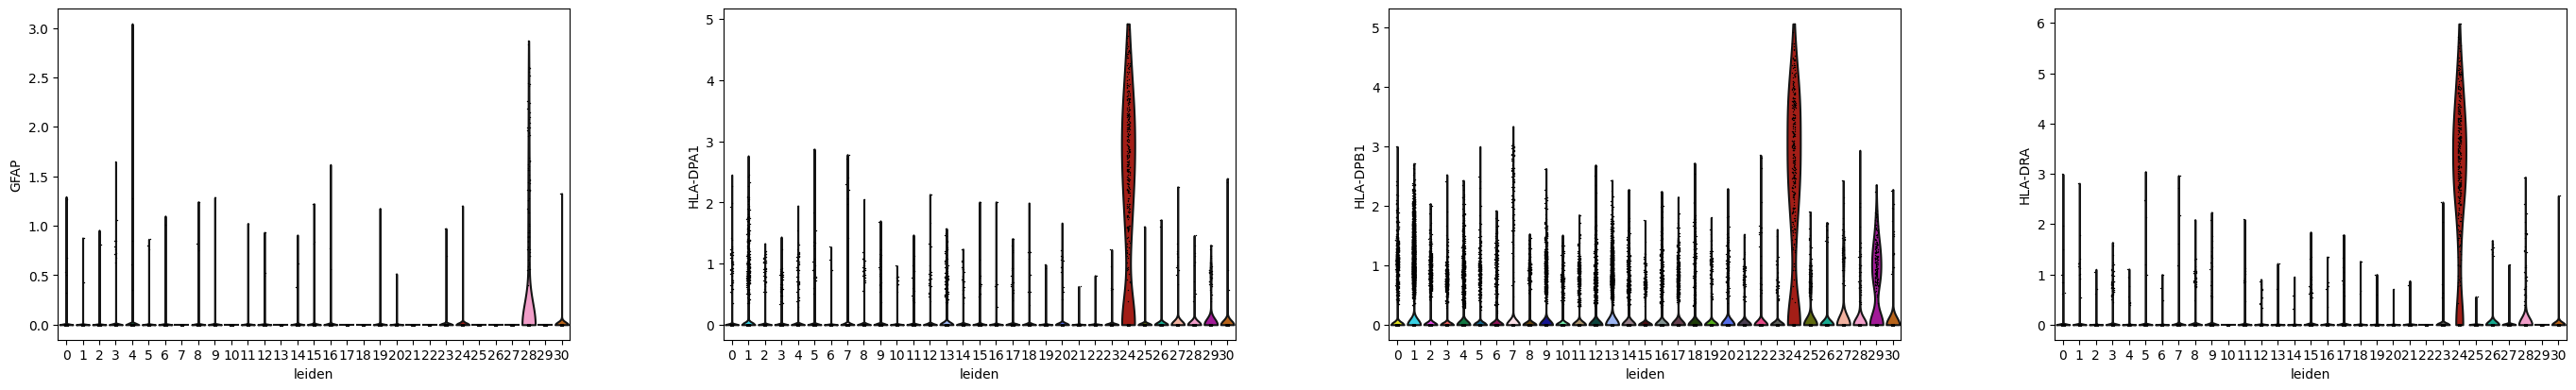

In [104]:
sc.pl.violin(adata, ['GFAP', 'HLA-DPA1', 'HLA-DPB1', 'HLA-DRA'], groupby='leiden')

In [ ]:
#again, currently working on identifying key cell types from research, 
#do i just cluster according to healthy markers?
#new_cluster_names = [
    'CD4 T', 'CD14 Monocytes',
    'B', 'CD8 T',
    'NK', 'FCGR3A Monocytes',
    'Dendritic', 'Megakaryocytes']
#adata.rename_categories('leiden', new_cluster_names)

In [110]:
print (adata)

AnnData object with n_obs × n_vars = 89927 × 1393
    obs: 'patient_id', 'sample_id', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'leiden'
    var: 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'hvg', 'leiden', 'leiden_colors', 'leiden_sizes', 'log1p', 'neighbors', 'paga', 'patient_id_colors', 'pca', 'rank_genes_groups', 'sample_id_colors', 'umap'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    obsp: 'connectivities', 'distances'


In [78]:
#sc.pl.umap(adata, color='leiden', legend_loc='on data', title='', frameon=False, save='.pdf')


In [ ]:
#sc.pl.dotplot(adata, marker_genes, groupby='leiden');


In [ ]:
#sc.pl.stacked_violin(adata, marker_genes, groupby='leiden', rotation=90);


In [ ]:
#adata
#adata.write(results_file, compression='gzip')  # `compression='gzip'` saves disk space, but slows down writing and subsequent reading


In [ ]:
#adata.raw.to_adata().write('./write/rb_withoutX.h5ad')
